# <b> Trabalhando com Planilhas do Excel

In [39]:
import pandas as pd

In [40]:
# Leitura dos arquivos

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

<b>Juntando todos os arquivos

In [41]:
df1.head(2)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6


In [42]:
df2.head(2)

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3


In [43]:
df3.head(2)

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2


In [44]:
df4.head(2)

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1


In [45]:
df5.head(2)

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3


O formato dos arquivos está legal.

In [46]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(130, 5)
(142, 5)
(240, 5)
(142, 5)
(240, 5)


In [47]:
# Concatenar todos os arquivos em um só
df = pd.concat([df1, df2, df3, df4, df5])
# Tamanho do df
print(df.shape)

(894, 5)


In [48]:
df.sample(10)  # amostras aleatorias

,Cidade,Data,Vendas,LojaID,Qtde
22,Fortaleza,2019-01-01,150.32,1005,1
59,Natal,2018-01-15,369.00,853,2
156,Salvador,2019-01-02,36.14,1037,3
137,Fortaleza,2019-03-02,51.99,983,3
166,Natal,2019-01-02,111.72,1035,3
88,Salvador,2019-01-01,31.20,1036,1
44,Salvador,2019-01-01,43.26,1037,2
162,Natal,2019-01-02,23.08,1036,2
185,Natal,2019-01-02,6.67,1036,1
68,Fortaleza,2019-01-01,85.09,1005,6


In [49]:
df.dtypes   # tipos de dados das colunas

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [50]:
type(df)   # df é do tipo DataFrame

pandas.core.frame.DataFrame

<i>Observe que a coluna LojaID é <b>int64</b>, ou seja, dado numérico, não será necessário efetuar operações com esta coluna então podemos converter pra string/<b>object</b>

In [51]:
df["LojaID"] = df["LojaID"].astype("object")

In [53]:
df["LojaID"].dtypes
# tipo 'O' de object

dtype('O')

In [55]:
df.dtypes  # observe que LojaID está sim como object

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

<b>Vamos verificar se nosso dataframe tem valores nulos ou faltantes

In [57]:
df.isnull().sum()
# observe que não há valores assim

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [60]:
# Caso haja, use o comando abaixo, substituindo o vazio pelo valor da média
# df["NOME_DA_COLUNA"].fillna(df["NOME_DA_COLUNA"].mean(), inplace=True)

# Caso queira substituir por Zero
# df["NOME_DA_COLUNA"].fillna(0, inplace=True)

# Apagando as linhas com valores nulos
# df.dropna(inplace=True)

# Apagando as linhas com valores nulos com base apenas em 1 coluna
# df.dropna(subset=["NOME_DA_COLUNA"], inplace=True)

# Removendo linhas que estejam com valores faltantes em todas as colunas
# df.dropna(how="all", inplace=True)

<b>Criando novas colunas

Criando coluna receita
RECEITA = VENDAS * QUANTIDADE

In [61]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [62]:
df.head(2)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26


In [63]:
# Caso queira achar a quantidade QUANTIDADE = RECEITA / VENDAS
# df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [64]:
# Retornar a maior receita, ou seja, o maior valor da coluna receita
df["Receita"].max()

3544.0

In [65]:
# Retornando a menor receita, ou seja, o menor valor da coluna receita
df["Receita"].min()

3.34

In [67]:
# Retorna os 3 maiores levando em conta a coluna RECEITA
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [72]:
# Retorna os 3 maiores levando em conta a coluna Receita
df.nlargest(3, "Qtde")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
13,Aracaju,2018-01-01,43.45,1522,10,434.5
16,Aracaju,2018-01-01,37.68,1522,10,376.8
26,Aracaju,2018-01-01,6.98,1521,10,69.8


In [76]:
# Agrupamento de receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [77]:
# Ordenando o conjunto de dados RECEITA de forma descendente
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [78]:
# Ordenando o conjunto de dados Quantidade de forma descedente
df.sort_values("Qtde", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
115,Aracaju,2018-01-01,50.99,1522,10,509.90
26,Aracaju,2018-01-01,6.98,1521,10,69.80
120,Aracaju,2018-01-01,7.73,1520,10,77.30
98,Aracaju,2018-01-01,138.33,1521,10,1383.30
16,Aracaju,2018-01-01,37.68,1522,10,376.80
13,Aracaju,2018-01-01,43.45,1522,10,434.50
113,Aracaju,2018-01-01,23.05,1521,9,207.45
78,Aracaju,2018-01-01,154.85,1522,9,1393.65
31,Aracaju,2018-01-01,171.16,1520,9,1540.44
43,Aracaju,2018-01-01,19.63,1523,9,176.67


# <b>Trabalhando com Datas

In [82]:
# Para converter a coluna de Data para tipo inteiro int64
# df["Data"] = df["Data"].astype("int64")

# Para converter novamente para tipo datetime
# df["Data"] = pd.to_datetime(df["Data"])

In [81]:
# Verificando novamente o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [91]:
# Agrupamento por ano, levanddo em consideração coluna "Receita", apresentando a somatória
### Ou seja, a somatória de receita para cada ano. ###
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [92]:
# Criando uma nova coluna e recebendo o "ano" de df["Data"]
df["Ano_Venda"] = df["Data"].dt.year

In [93]:
df.head(2)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018


In [94]:
# Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [103]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
132,Natal,2019-01-02,19.61,1036,2,39.22,2019,1,2
115,Fortaleza,2019-03-02,12.23,981,3,36.69,2019,3,2
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019,2,13


In [104]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [106]:
# Calculando a diferença de dias, entre o valor da data de uma linha e a primeira data
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [133]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
77,Recife,2019-01-01,102.82,981,6,616.92,2019,1,1,365 days
13,Salvador,2019-02-12,39.29,1035,1,39.29,2019,2,12,407 days
61,Aracaju,2018-01-01,39.80,1520,6,238.80,2018,1,1,0 days
68,Fortaleza,2019-01-01,85.09,1005,6,510.54,2019,1,1,365 days
63,Natal,2018-02-12,552.00,852,2,1104.00,2018,2,12,42 days
197,Natal,2019-01-02,10.45,1036,2,20.90,2019,1,2,366 days


In [134]:
# Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [209]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
68,Natal,2018-06-22,274.00,852,3,822.00,2018,6,22,172 days,2
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
94,Aracaju,2018-01-01,198.24,1521,9,1784.16,2018,1,1,0 days,1
36,Salvador,2019-01-01,9.67,1037,1,9.67,2019,1,1,365 days,1
39,Aracaju,2018-01-01,11.11,1522,8,88.88,2018,1,1,0 days,1


In [210]:
''' Filtrando as vendas de 2019 do mês de março '''

vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [214]:
display(vendas_marco_19)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


# <b> Visualização dos dados

In [216]:
# Quantidade de IDs da coluna LojaID
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

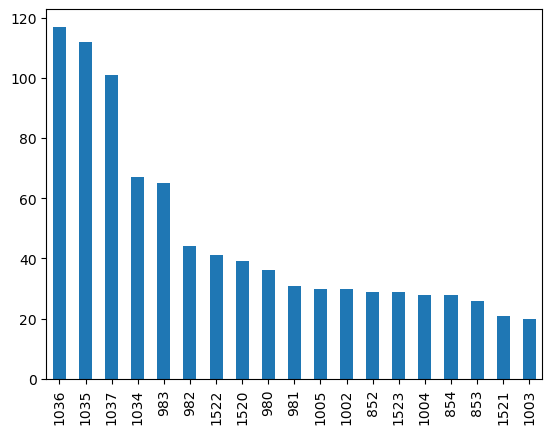

In [218]:
# Grafico de Barras - Quantidade de IDs
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

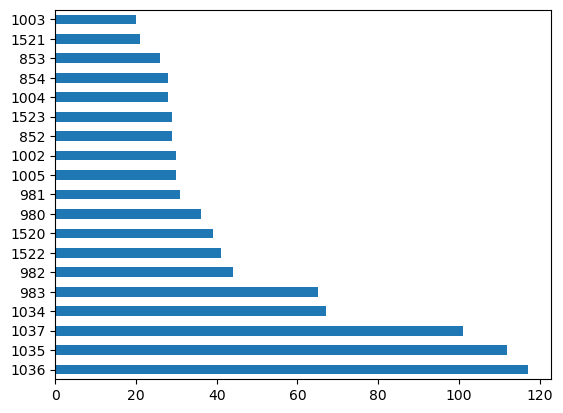

In [219]:
# Grafico de Barras Horizontais
df["LojaID"].value_counts().plot.barh()

<AxesSubplot:>

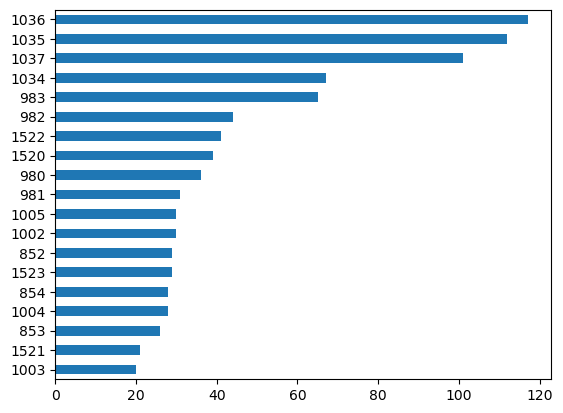

In [220]:
# Grafico de barras horizontais, segunda forma
df["LojaID"].value_counts(ascending=True).plot.barh()

<AxesSubplot:ylabel='Receita'>

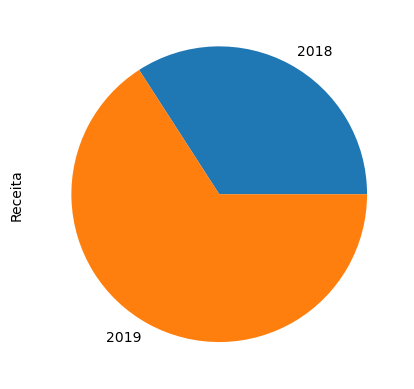

In [222]:
# Grafico de Pizza - somatório da receita agrupado por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64


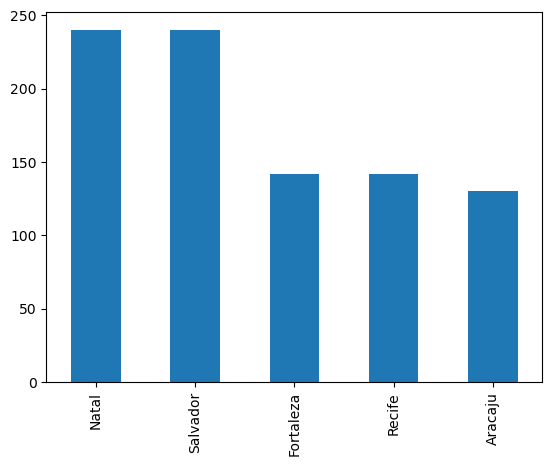

In [225]:
# Total de vendas por cidade
df["Cidade"].value_counts().plot.bar()
print(df["Cidade"].value_counts())

In [226]:
# Adicionar titulo e alterar nome dos eixos
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total vendas')

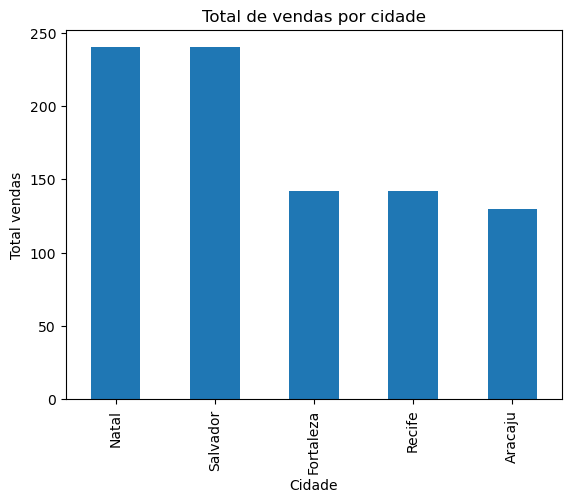

In [227]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")

In [228]:
'''
para alterar a cor do gráfico acima
 
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color='red')
basta adicionar o argumento color='red'
'''

'\npara alterar a cor do gráfico acima\n \ndf["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color=\'red\')\nbasta adicionar o argumento color=\'red\'\n'

In [230]:
# Alterando o estilo
plt.style.use("ggplot")

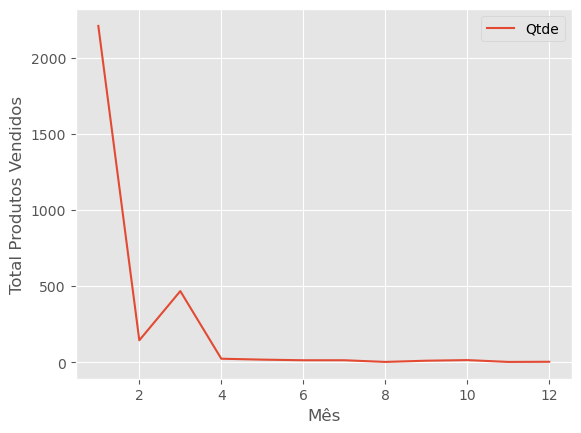

In [231]:
# Agora aplicando o novo estilo de gráfico
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [232]:
# Agrupou quantidade de vendas no total por mês da venda
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [234]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [235]:
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


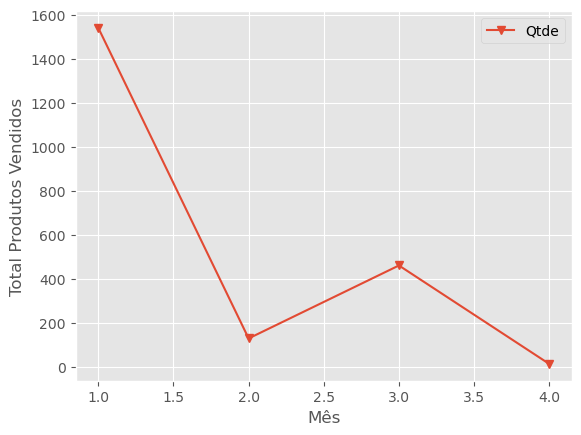

In [238]:
# Total de produtos vendidos por mÊs
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

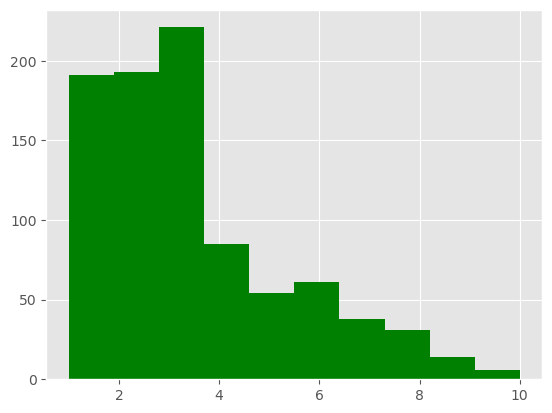

In [239]:
# Gráfico de Histograma
plt.hist(df["Qtde"], color="green")

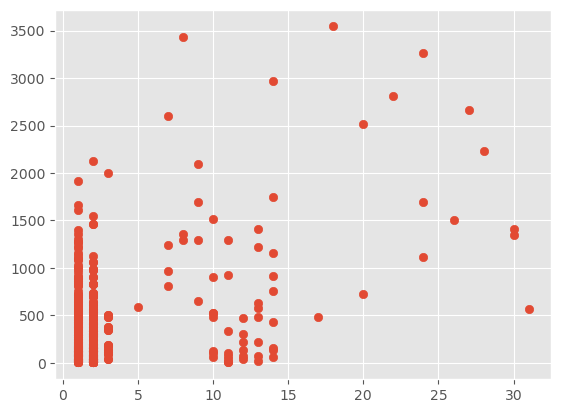

In [241]:
# Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"])

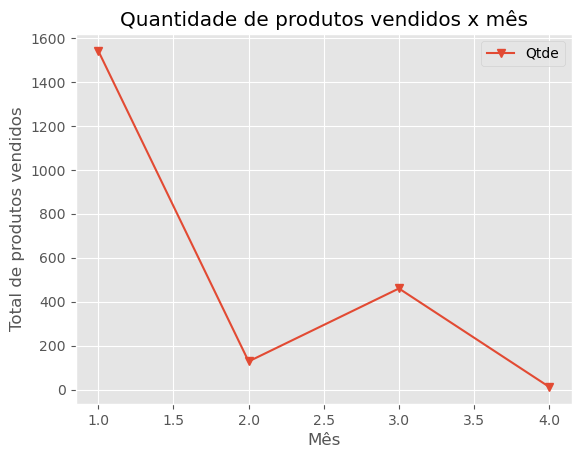

In [243]:
# Salvando em PNG
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafico_qtde_x_mes.png")